# Buckling tension for spoked wheel

In [1]:
from sympy import *
init_printing()

# setup symbols
s = symbols('s', real=true)
n = symbols('n', integer=true, positive=true)

u_n, phi_n = symbols('u_n phi_n', real=true)

# rim properties
R, EI, GJ, EIw, mu, rx, ry, y0 = symbols('R EI GJ EIw mu rx ry y0',
                                         real=true, finite=true,
                                         positive=true)

# spoke properties
ns = symbols('n_s', integer=true, positive=true)
T, EA, ls, alpha = symbols('T, EA, l_s, alpha', real=true, positive=true)
k_uu_el, k_uu_T = symbols('k_uu^el, k_uu^T', real=true)
k_uu = k_uu_el + T*k_uu_T

# Kinematics
Assume sinusoidal buckling mode shape and calculate curvatures

In [2]:
u = u_n * cos(n*s/R)
phi = phi_n * cos(n*s/R)

k2 = diff(u, s, s) - phi/R
k3 = diff(phi, s) + diff(u, s)/R

## Total potential energy
Total potential energy equals strain energy minus virtual work

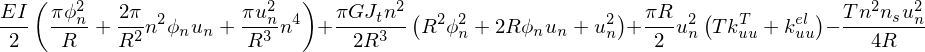

In [3]:
# Rim strain energy
U_bend = integrate((EI*k2**2)/2, (s, 0, 2*pi*R))
U_GJ = integrate((GJ*k3**2)/2, (s, 0, 2*pi*R))
U_EIw = integrate((EIw*diff(k3, s)**2)/2, (s, 0, 2*pi*R))

# Combine uniform torsion and warping into a single mode-dependent stiffness
GJt = symbols('GJ_t', real=true)
U_tors = (U_GJ + U_EIw).simplify().subs(EIw*n**2+GJ*R**2, GJt*R**2)

# Spoke strain energy
U_spokes = integrate(k_uu*u**2/2, (s, 0, 2*pi*R))

# Rim virtual work
N_rim = ns*T/(2*pi)
V_rim = integrate(N_rim/2 * diff(u, s)**2, (s, 0, 2*pi*R))

PE_total = U_bend + U_tors + U_spokes - V_rim
PE_total

## Buckling criterion
The total potential energy can be written in a quadratic form:

$\Pi_{total} = q \cdot K \cdot q$

where $q = (u_n, \phi_n)$ and $K$ is a Jacobian matrix. The $n$th mode becomes unstable when the determinant of the Jacobian vanishes.

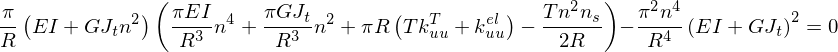

In [4]:
K_uu = diff(PE_total, u_n, u_n)
K_up = diff(PE_total, u_n, phi_n)
K_pp = diff(PE_total, phi_n, phi_n)

buckling_criterion = Eq(K_uu*K_pp - K_up**2, 0)
buckling_criterion

## Solve for the critical tension

The expression below is equivalent to Eqn. (24) in the paper with simplifications.

In [5]:
Tcr = solve(buckling_criterion.subs(k_uu_T, ns/(2*pi*R*ls)), T)[0]